In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('hate_speech.csv')

In [3]:
data.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [4]:
data.tail()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm
40622,40740,9999,dalits are deserves to be treated as lowlife,hate,notgiven,True,0.94324,dynabench entry,1,train,cagnluiznm


In [5]:
data.shape

(40623, 11)

In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'text', 'label', 'type', 'model_wrong',
       'db.model_preds', 'status', 'round', 'split', 'annotator'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0            0
id                    0
text                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64

In [3]:
data.drop(columns = ['Unnamed: 0'], axis = 1 , inplace = True)

In [10]:
data

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...
40618,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


In [4]:
data.dropna(axis = 0,inplace = True)

In [12]:
data

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...
40618,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


In [13]:
data.nunique()

id                26097
text              25968
label                 2
type                  7
model_wrong           2
db.model_preds    12118
status                1
round                 3
split                 3
annotator            11
dtype: int64

In [14]:
data['label'].unique()

array(['hate', 'nothate'], dtype=object)

In [15]:
data['label'].value_counts()

hate       15253
nothate    10844
Name: label, dtype: int64

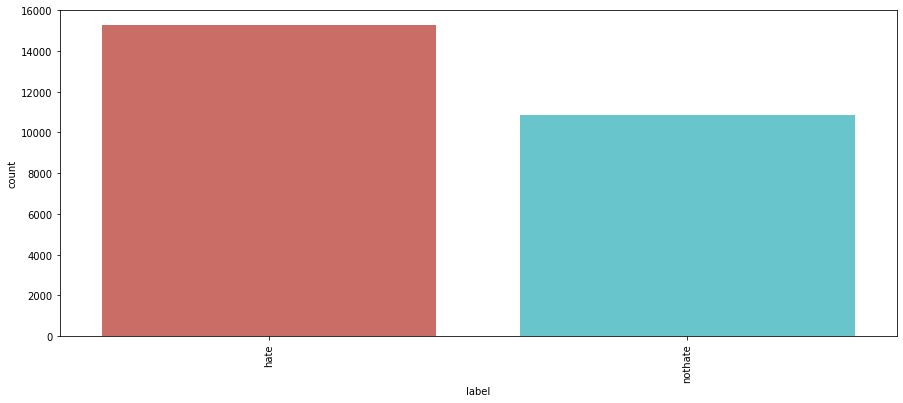

In [16]:
plt.figure(figsize = (15,6))
sns.countplot(data['label'], data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

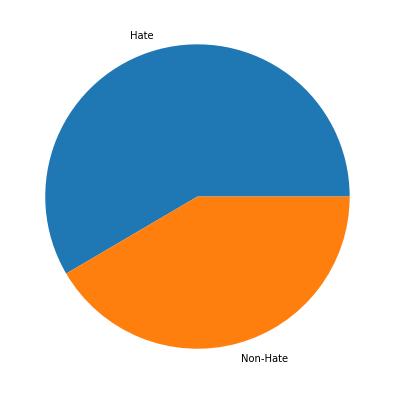

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data['label'].value_counts(), labels = ['Hate', 'Non-Hate'])
plt.show()

In [18]:
data['type'].unique()

array(['notgiven', 'none', 'derogation', 'dehumanization', 'threatening',
       'animosity', 'support'], dtype=object)

In [19]:
data['type'].value_counts()

none              10844
notgiven           7645
derogation         5377
animosity          1121
threatening         650
dehumanization      390
support              70
Name: type, dtype: int64

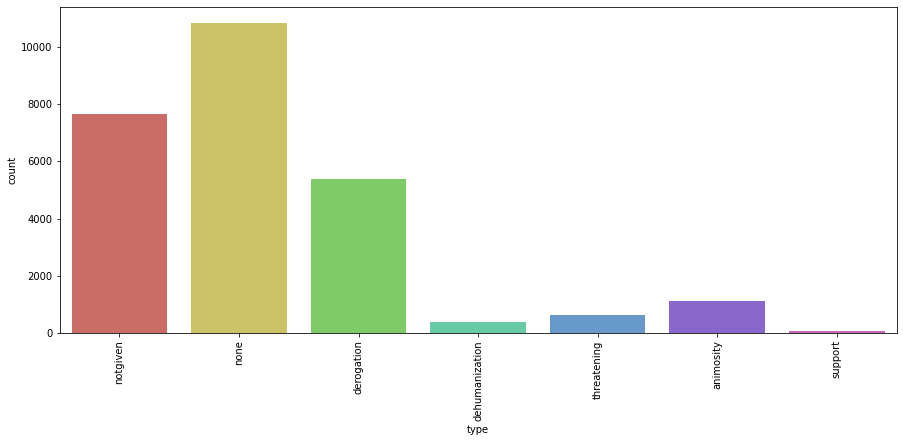

In [20]:
plt.figure(figsize = (15,6))
sns.countplot(data['type'], data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data['type'].value_counts(), labels = ['notgiven', 'none', 'derogation', 'dehumanization', 'threatening',
       'animosity', 'support'])
plt.show()

In [21]:
data['model_wrong'].unique()

array([True, False], dtype=object)

In [22]:
data['model_wrong'].value_counts()

True     15436
False    10661
Name: model_wrong, dtype: int64

In [23]:
data['round'].unique()

array(['1', '2a', '3a'], dtype=object)

In [24]:
data['round'].value_counts()

1     11542
2a     9580
3a     4975
Name: round, dtype: int64

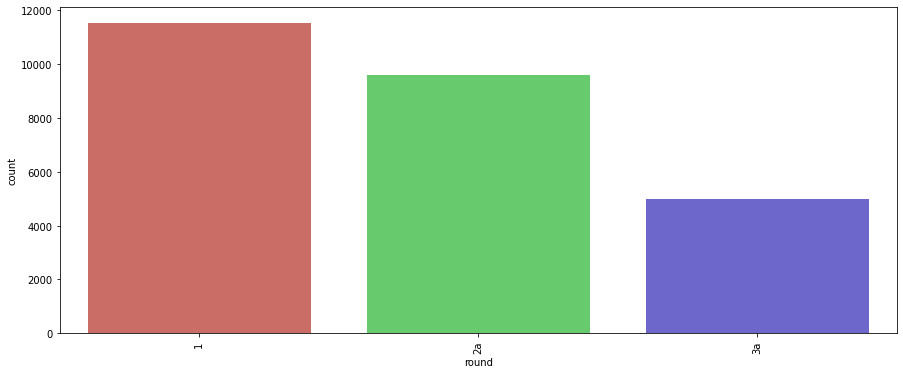

In [25]:
plt.figure(figsize = (15,6))
sns.countplot(data['round'], data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

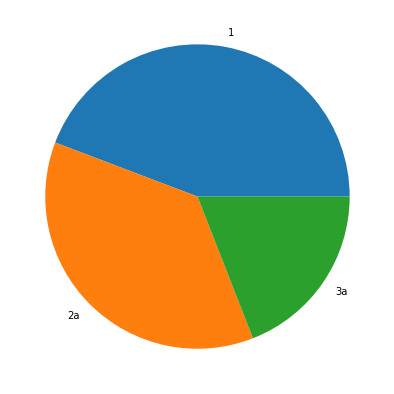

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data['round'].value_counts(), labels = ['1', '2a', '3a'])
plt.show()

In [27]:
data['split'].unique()

array(['train', 'test', 'dev'], dtype=object)

In [28]:
data['split'].value_counts()

train    21549
dev       2453
test      2095
Name: split, dtype: int64

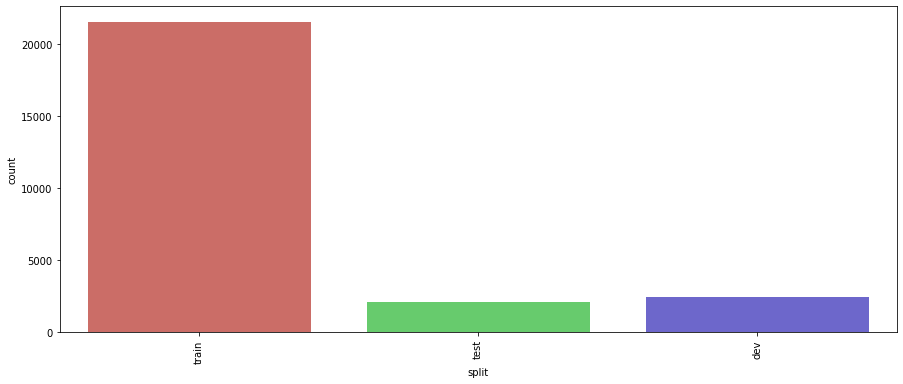

In [29]:
plt.figure(figsize = (15,6))
sns.countplot(data['split'], data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

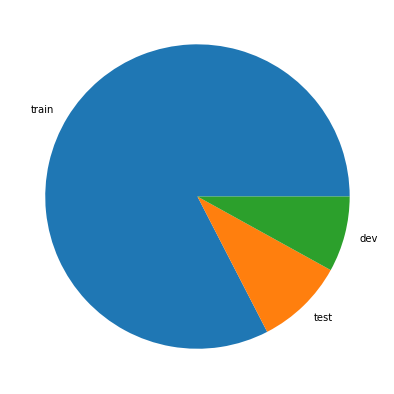

In [30]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data['split'].value_counts(), labels = ['train', 'test', 'dev'])
plt.show()

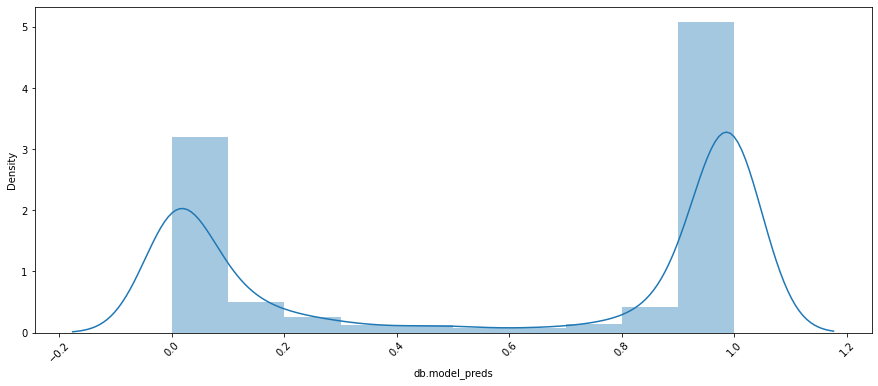

In [5]:
plt.figure(figsize =(15, 6))
sns.distplot(data['db.model_preds'], kde = True, bins = 10)
plt.xticks(rotation = 45)
plt.show()

In [31]:
data.groupby('type').count()['id']

type
animosity          1121
dehumanization      390
derogation         5377
none              10844
notgiven           7645
support              70
threatening         650
Name: id, dtype: int64

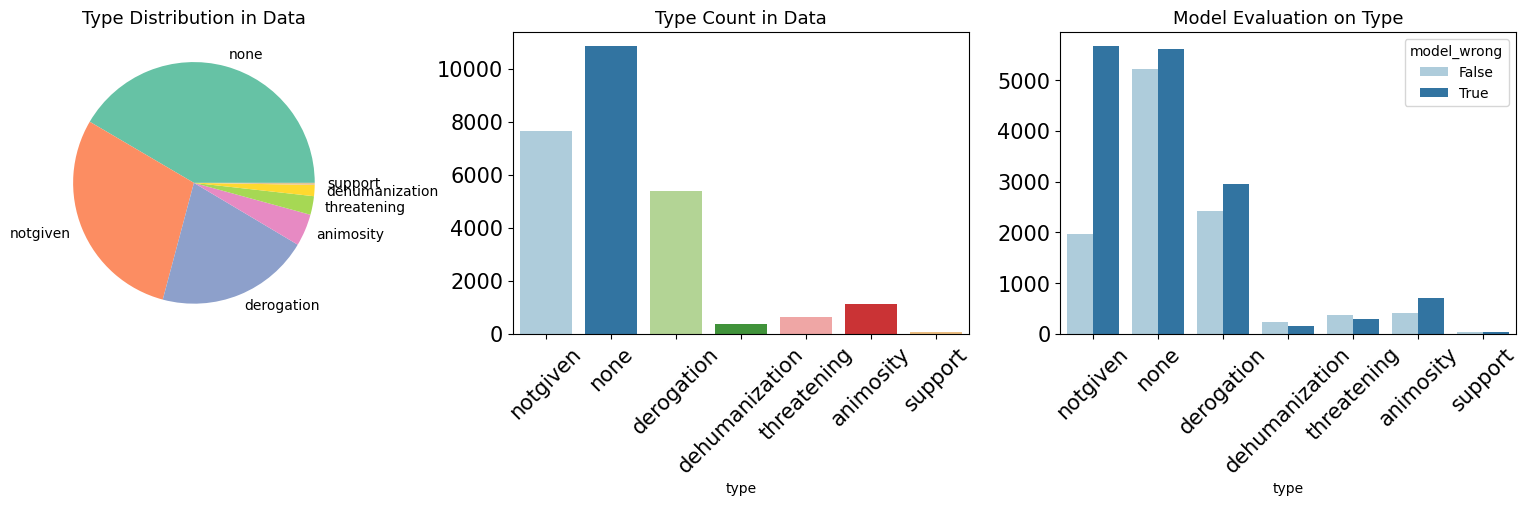

In [32]:
fig,ax = plt.subplots(ncols = 3, figsize = (20,4) , dpi = 100)

colors = ['#66c2a5', '#fc8d62' , '#8da0cb' ,'#e78ac3' , '#a6d854' , '#ffd92f','#e5c494']
data['type'].value_counts().plot(kind = 'pie',ax = ax[0], labels = data['type'].value_counts().index , colors = colors)
sns.countplot(x = 'type',data = data , ax = ax[1] , palette = 'Paired')
sns.countplot(x = 'type' , data = data , hue = 'model_wrong', palette = 'Paired')

for i in range(3):
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=15 , rotation = 45)
    ax[i].tick_params(axis='y', labelsize=15)

ax[0].set_title('Type Distribution in Data', fontsize=13)
ax[1].set_title('Type Count in Data', fontsize=13)
ax[2].set_title('Model Evaluation on Type', fontsize = 13)

plt.show()

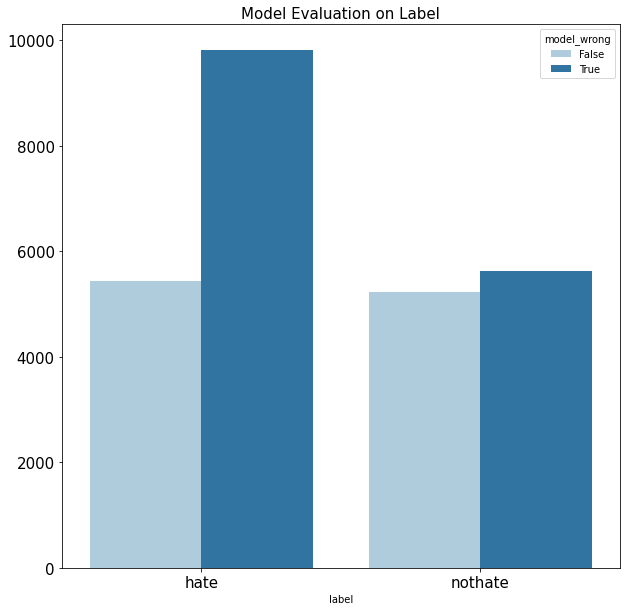

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'label' , data = data, hue = 'model_wrong' , palette = 'Paired')
plt.ylabel("")
plt.tick_params(axis = 'x',labelsize = 15)
plt.tick_params(axis = 'y',labelsize = 15)
plt.title("Model Evaluation on Label" , fontsize = 15)
plt.show()

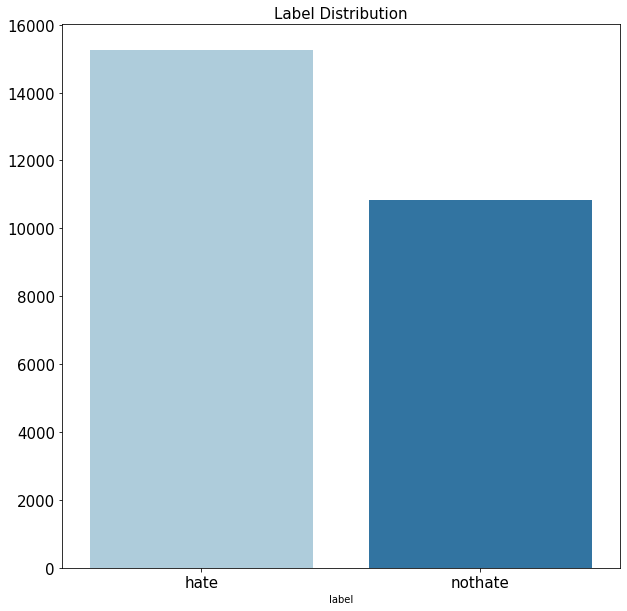

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'label' , data = data, palette = 'Paired')
plt.ylabel("")
plt.tick_params(axis = 'x',labelsize = 15)
plt.tick_params(axis = 'y',labelsize = 15)
plt.title("Label Distribution" , fontsize = 15)
plt.show()

In [35]:
import nltk
import re
import contractions
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def clean_txt(txt):
        ##html code
        TAG_RE = re.compile(r'<[^>]+>') 
        txt = TAG_RE.sub('', txt.lower())
        ##emojis
        txt=txt.encode("ascii","ignore")
        txt=txt.decode()
        ##numbers removing
        txt=''.join(i for i in txt if not i.isdigit())
        ##punctuation
        txt = re.sub(r'[^\w\s]', ' ', txt) 
        ##stopwords
        txt = ' '.join([i for i in txt.split() if not i in STOPWORDS])
        ##removing certain sized words
        txt=' '.join([i for i in txt.split() if len(i)>2])
        ##contractions
        txt=contractions.fix(txt)
        ##stemmers
        ##txt= stemmer.stem(txt)  should stemming be performed or lemmatization and why?
        ##lemmatizer
        txt=lemmatizer.lemmatize(txt)
        return txt

In [37]:
data['Clean Text'] = data['text'].apply(clean_txt)
data.head()

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,Clean Text
0,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,legal husband rape wife
1,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,dalits lowlife scum
2,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,dalits lowlives
3,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,better world women dare question men
4,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,work hard immigrants take benefits


In [38]:
data['model_wrong'] = data['model_wrong'].astype("string")
data['model_wrong'].dtype

string[python]

In [39]:
vocab = [ ]
model_wrong = []
label = []
for _,row in data.iterrows():
    a = row['Clean Text'].split()
    if(row['label'] == 'hate'):
        label+=[0 for i in range(len(a))]
    else:
        label+=[1 for i in range(len(a))]
    if(row['model_wrong'] == 'True'):
        model_wrong+=[0 for i in range(len(a))]
    else:
        model_wrong+=[1 for i in range(len(a))]
    vocab+=a

In [40]:
vocab_model_relation = pd.DataFrame({'Words': vocab , 'Model Wrong': model_wrong ,'Label': label })
#vocab_model_relation.drop_duplicates(subset=['Words'],inplace=True)
vocab_model_relation.head()

,Words,Model Wrong,Label
0,legal,0,0
1,husband,0,0
2,rape,0,0
3,wife,0,0
4,dalits,1,0


In [41]:
words = vocab_model_relation[vocab_model_relation['Model Wrong'] == 1]['Words'].value_counts().index
words

Index(['people', 'black', 'women', 'fucking', 'like', 'love', 'would', 'think',
       'white', 'get',
       ...
       'exported', 'entrenched', 'moisturizer', 'impudence', 'unruliness',
       'petulant', 'functioning', 'argumentativenss', 'cushty', 'shifty'],
      dtype='object', length=12900)

In [42]:
words2 = vocab_model_relation[vocab_model_relation['Model Wrong'] == 0]['Words'].value_counts().index
words2

Index(['people', 'black', 'women', 'fucking', 'like', 'think', 'white', 'want',
       'love', 'everyone',
       ...
       'ideological', 'browned', 'whited', 'sympathise', 'whiting', 'muddling',
       'rub', 'illogicality', 'idealistic', 'unworthy'],
      dtype='object', length=10899)

In [43]:
common_words = list(set(word) & set(words2))
common_words[:10]

['somewhere',
 'may',
 'orgasm',
 'trade',
 'roman',
 'compared',
 'minimum',
 'photograph',
 'demand',
 'fragile']

In [44]:
words = list(set(words).difference(set(common_words)))
words[:10]

['throat',
 'fetishism',
 'hairdresser',
 'nonopioid',
 'itsokaytobewhite',
 'sharting',
 'dur',
 'tchonx',
 'burlesque',
 'reprisal']

In [45]:
words2 = list(set(words2).difference(set(common_words)))
words2[:10]

['tottenham',
 'bathrooms',
 'achieves',
 'intensify',
 'fifties',
 'tanking',
 'cumbergrounds',
 'explicitely',
 'lifes',
 'pochahontus']

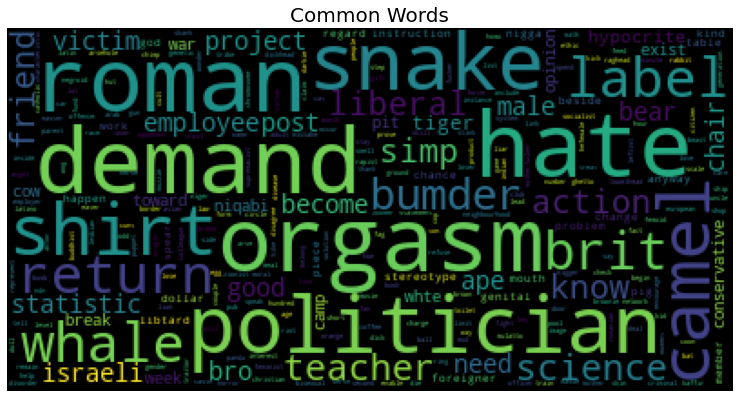

In [46]:
from wordcloud import WordCloud
def wc(data,bgcolor,title):
    plt.figure(figsize = (13,10))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.title(title , fontsize = 20)
    plt.imshow(wc)
    plt.axis('off')

wc(common_words,'black','Common Words')

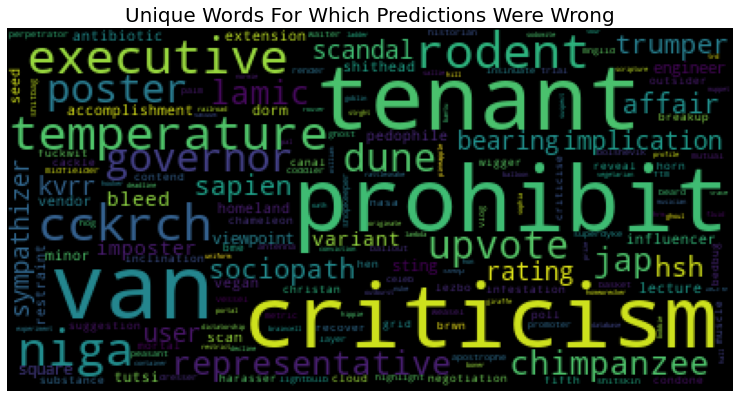

In [47]:
wc(words,'black','Unique Words For Which Predictions Were Wrong')

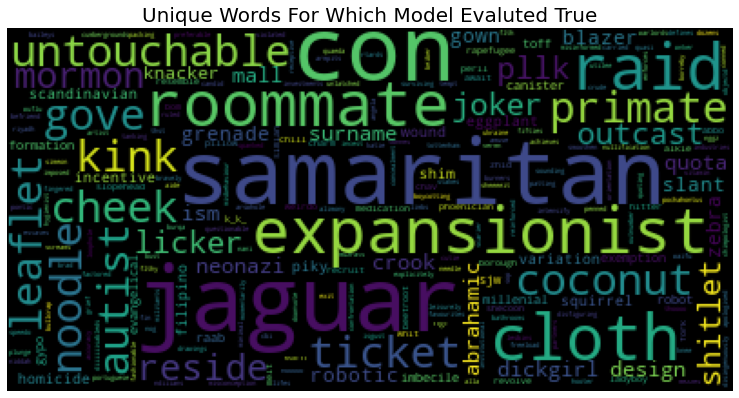

In [48]:
wc(words2,'black','Unique Words For Which Model Evaluted True')

Text(0.5, 1.0, 'Model Got Them Wrong')

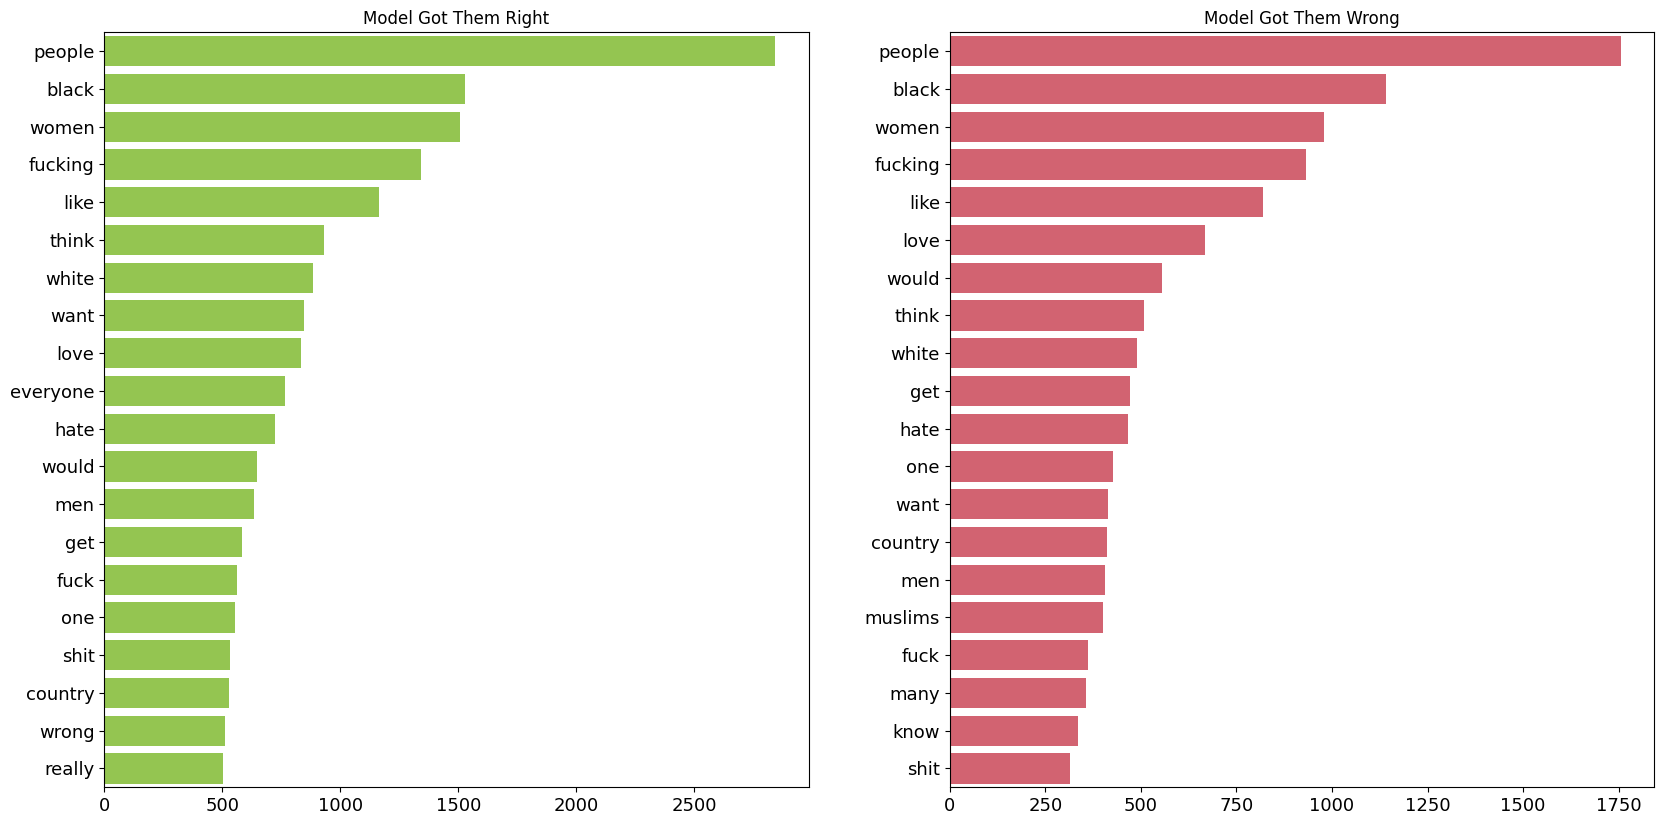

In [49]:
fig , ax = plt.subplots(ncols = 2,figsize = (20,10) , dpi = 100)

sns.barplot(y = vocab_model_relation[vocab_model_relation['Model Wrong'] == 0]['Words'].value_counts().index[0:20] , x = vocab_model_relation[vocab_model_relation['Model Wrong'] == 0]['Words'].value_counts().values[:20], ax = ax[0] , color = '#97d83e')
sns.barplot(y = vocab_model_relation[vocab_model_relation['Model Wrong'] == 1]['Words'].value_counts().index[0:20] , x = vocab_model_relation[vocab_model_relation['Model Wrong'] == 1]['Words'].value_counts().values[:20], ax = ax[1] , color = '#e55063')

for i in range(2):
    ax[i].tick_params(axis = 'x' , labelsize = 13)
    ax[i].tick_params(axis = 'y' , labelsize = 13)

ax[0].set_title('Model Got Them Right')
ax[1].set_title('Model Got Them Wrong')

Text(0.5, 1.0, 'Top 20 Words Used In Non Hate Comments')

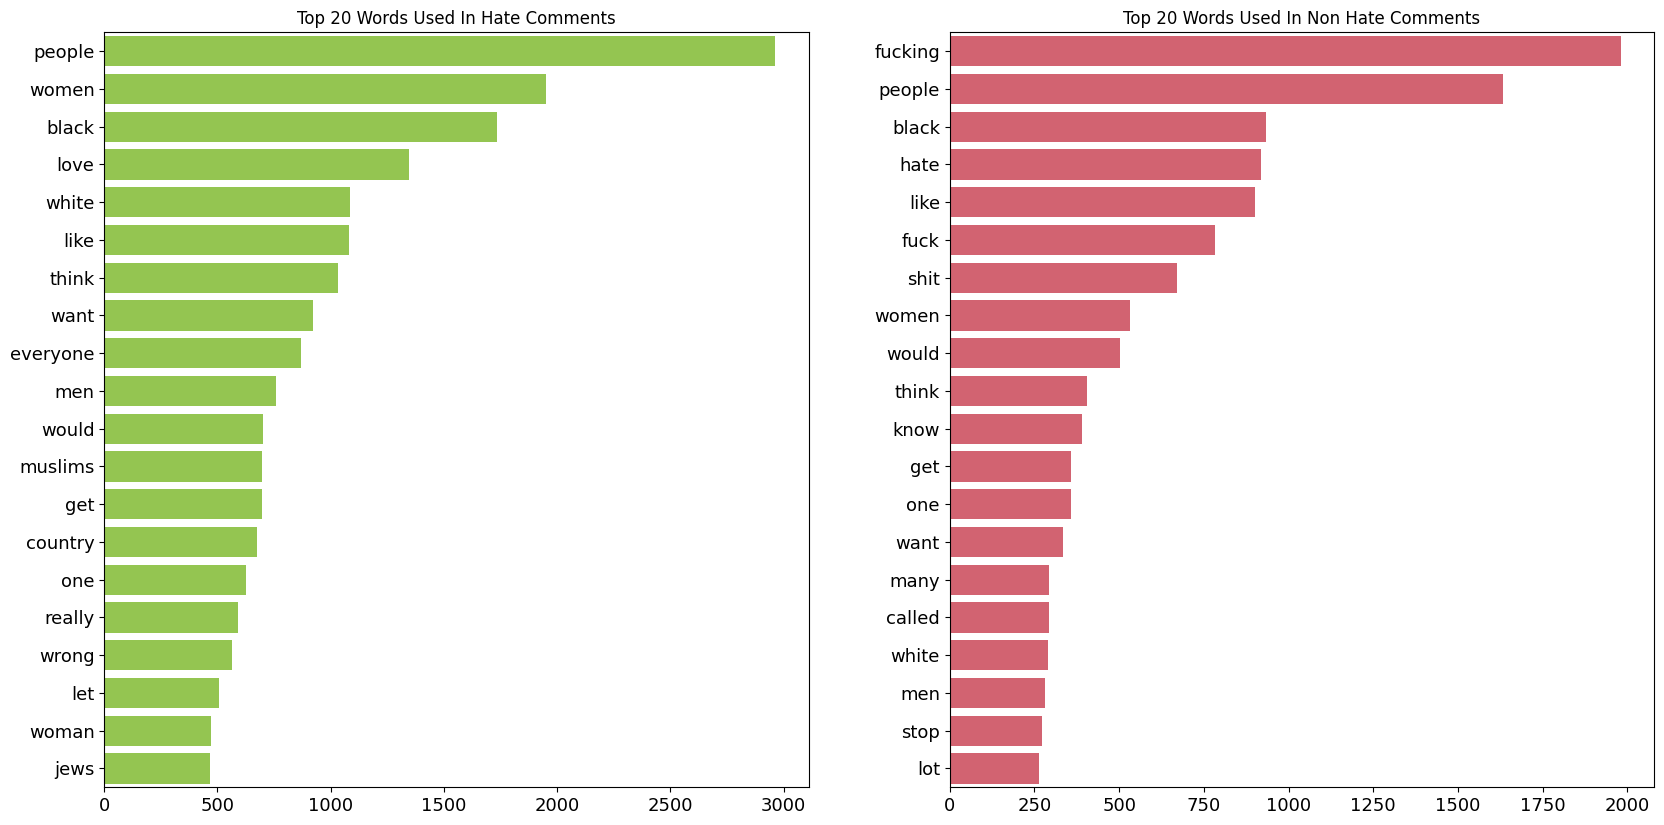

In [50]:
fig , ax = plt.subplots(ncols = 2,figsize = (20,10) , dpi = 100)

sns.barplot(y = vocab_model_relation[vocab_model_relation['Label'] == 0]['Words'].value_counts().index[0:20] , x = vocab_model_relation[vocab_model_relation['Label'] == 0]['Words'].value_counts().values[:20], ax = ax[0] , color = '#97d83e')
sns.barplot(y = vocab_model_relation[vocab_model_relation['Label'] == 1]['Words'].value_counts().index[0:20] , x = vocab_model_relation[vocab_model_relation['Label'] == 1]['Words'].value_counts().values[:20], ax = ax[1] , color = '#e55063')

for i in range(2):
    ax[i].tick_params(axis = 'x' , labelsize = 13)
    ax[i].tick_params(axis = 'y' , labelsize = 13)

ax[0].set_title('Top 20 Words Used In Hate Comments')
ax[1].set_title('Top 20 Words Used In Non Hate Comments')

In [51]:
data['annotator'].unique()

array(['gnzuctwed3', 'cagnluiznm', 'vde7gn0nrl', 'tbubpfn6ip',
       'oemywm1tjg', 'trrf46jwfp', 'uiskeftl5s', 'lqlkttromx',
       'qiokkci7f8', 'e3dsmnspob', 'elgzdd8tvb'], dtype=object)

In [52]:
colors_false = ['grey' for i in data[data['model_wrong'] == 'False']['annotator'].value_counts().index]
colors_false[2] = '#dd5a5b'
colors_true = ['grey' for i in data[data['model_wrong'] == 'True']['annotator'].value_counts().index]
colors_true[1] = '#dd5a5b'

Text(0.5, 1.0, 'Model Got Them Wrong')

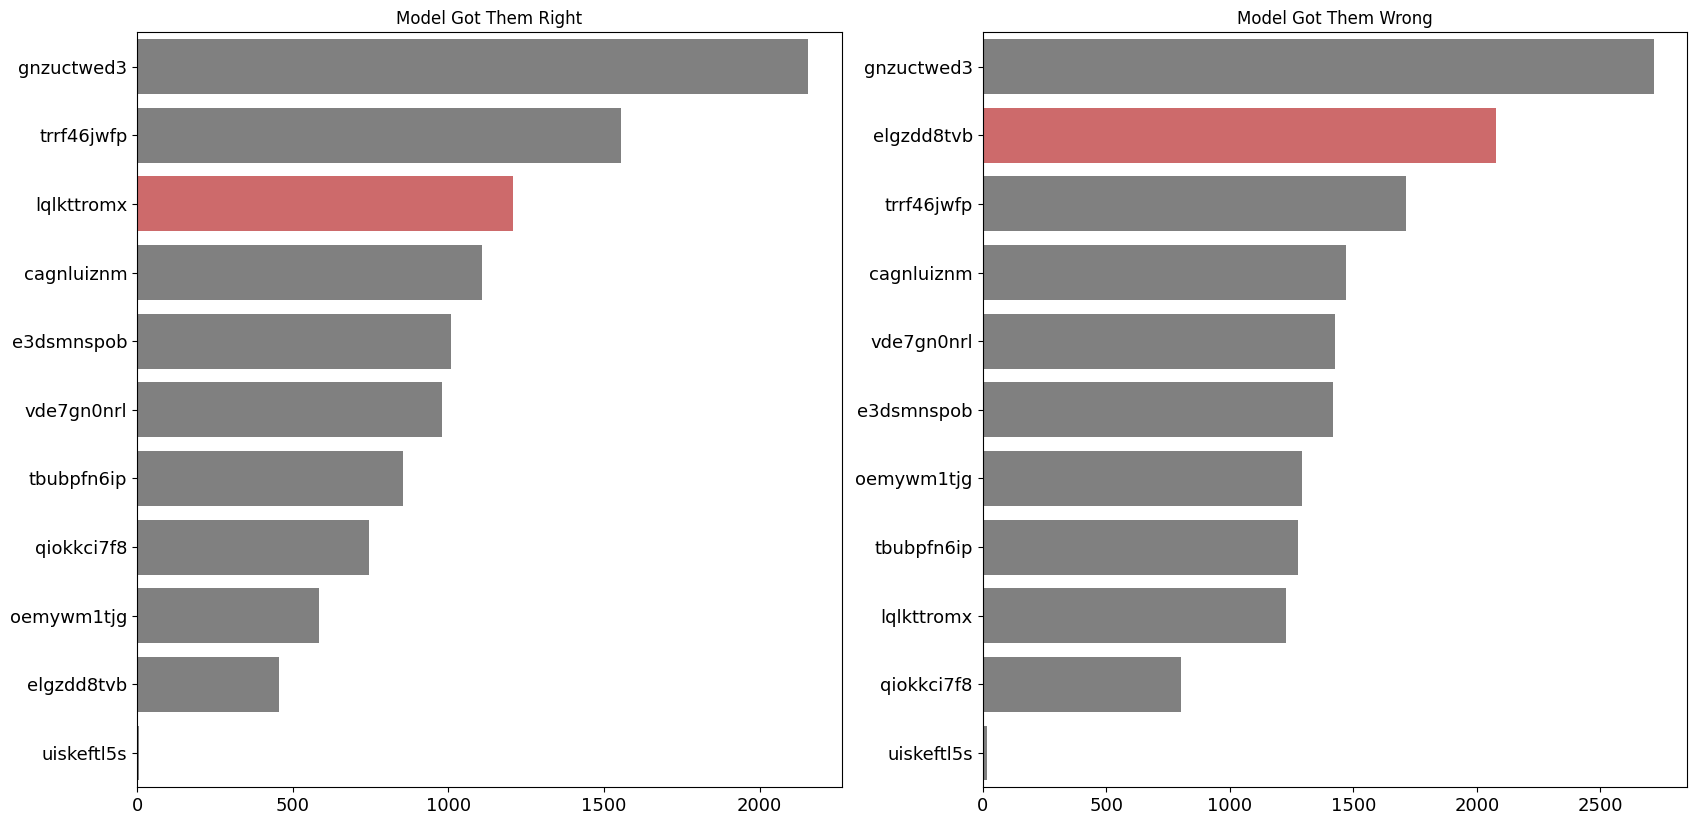

In [53]:
fig , ax = plt.subplots(ncols = 2,figsize = (20,10) , dpi = 100)

sns.barplot(y = data[data['model_wrong'] == 'False']['annotator'].value_counts().index , x = data[data['model_wrong'] == 'False']['annotator'].value_counts().values, ax = ax[0] , palette = colors_false)
sns.barplot(y = data[data['model_wrong'] == 'True']['annotator'].value_counts().index, x = data[data['model_wrong'] == 'True']['annotator'].value_counts().values, ax = ax[1] , palette = colors_true)

for i in range(2):
    ax[i].tick_params(axis = 'x' , labelsize = 13)
    ax[i].tick_params(axis = 'y' , labelsize = 13)
    
ax[0].set_title('Model Got Them Right')
ax[1].set_title('Model Got Them Wrong')

In [54]:
new_data = pd.read_csv('hate_speech_new.csv')

In [55]:
tags = []
for i in range(new_data.shape[0]):
    try:
        tags.append(list(new_data.iloc[i,:].index)[list(new_data.iloc[i,:].values).index(1)])
    except:
        tags.append('Nothing')
    
print(tags[:2])

['NoTargetRecorded', 'dis']


In [56]:
m_data = data.merge(pd.DataFrame({'id':new_data['id'],'targets':tags}) , on = 'id' , how='inner')

In [57]:
m_data.head()

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,Clean Text,targets
0,19625,Immigrants are usually unpleasant,hate,notgiven,False,0.00034,dynabench entry,2a,test,gnzuctwed3,immigrants usually unpleasant,NoTargetRecorded
1,19637,r3t4rds are a burden to society,hate,derogation,False,0.00038,dynabench entry,2a,train,trrf46jwfp,rtrds burden society,dis
2,19638,There are too many b l a c k s in this country,hate,derogation,False,0.00034,dynabench entry,2a,train,qiokkci7f8,many country,bla
3,19640,m0ng0l0ids are a burden to society,hate,derogation,False,0.00039,dynabench entry,2a,train,trrf46jwfp,mnglids burden society,dis
4,19641,m0ng0s are a burden to society,hate,derogation,False,0.00036,dynabench entry,2a,train,trrf46jwfp,mngs burden society,dis


In [58]:
m_data['label'].unique()

array(['hate', 'nothate'], dtype=object)

In [59]:
m_data['label'].value_counts()

hate       10293
nothate     7949
Name: label, dtype: int64

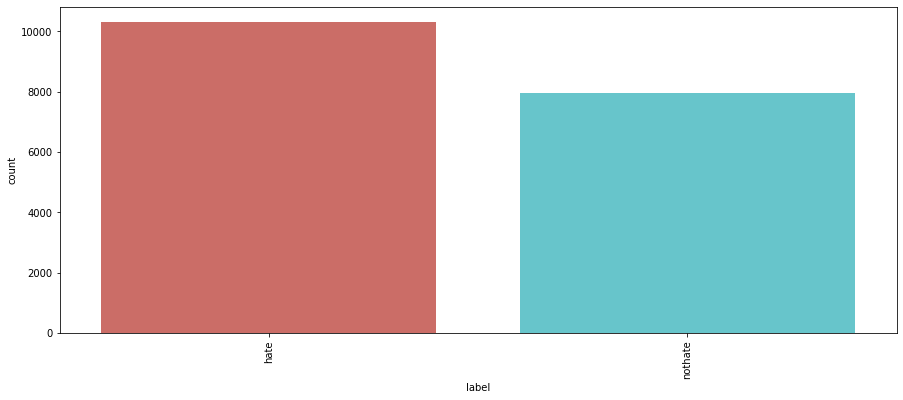

In [60]:
plt.figure(figsize = (15,6))
sns.countplot(m_data['label'], data = m_data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

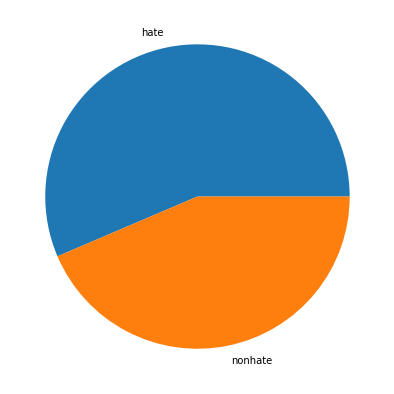

In [61]:
fig = plt.figure(figsize =(10, 7))
plt.pie(m_data['label'].value_counts(), labels = ['hate', 'nonhate'])
plt.show()

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(m_data['targets'], data = m_data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [62]:
colors = ['grey' for i in range(len(m_data['targets'].value_counts().index))] 
colors[2] = '#dd5a5b'
colors[3] = '#97d83e'

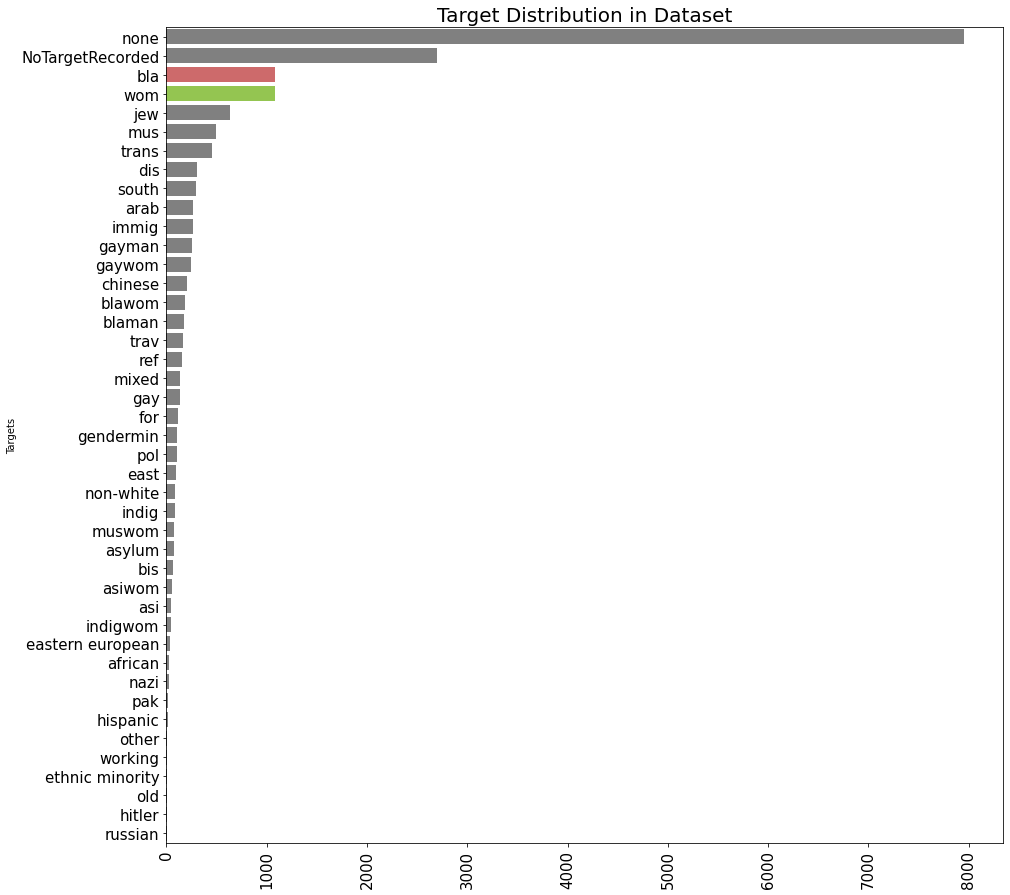

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(y=m_data['targets'],order = m_data['targets'].value_counts().index, palette = colors)
plt.tick_params(axis = 'y' , labelsize = 15)
plt.tick_params(axis = 'x' , labelsize = 15)
plt.ylabel('Targets')
plt.xlabel('')
plt.title("Target Distribution in Dataset" , fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [64]:
words_black = [ ]
labels = []
for _,row in m_data[m_data['targets'] == 'bla'].iterrows():
    a = row['Clean Text'].split()
    if(row['label'] == 0):
        labels+=[0 for i in range(len(a))]
    else:
        labels+=[1 for i in range(len(a))]
    words_black+=a

words_black = pd.DataFrame({'Word':words_black , 'Label':labels})
words_black.head()

,Word,Label
0,many,1
1,country,1
2,hate,1
3,smell,1
4,niggers,1


Text(0.5, 1.0, 'Total Sentences Labeled Hate and Not Hate')

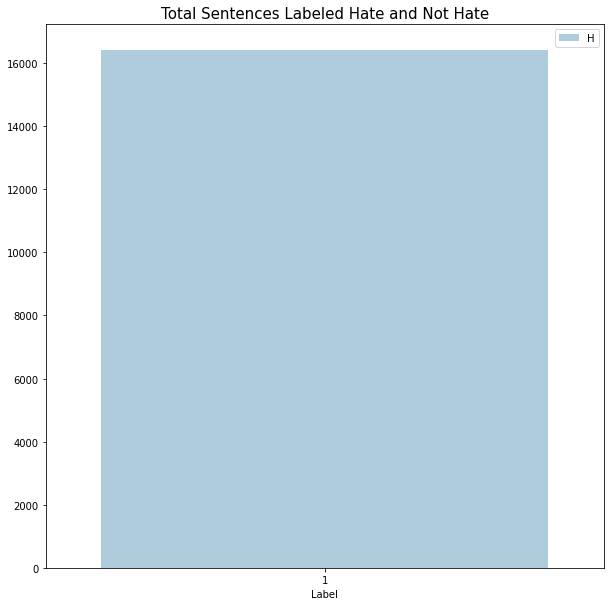

In [65]:
plt.figure(figsize = (10,10))
sns.countplot(words_black['Label'] , palette = 'Paired')
plt.ylabel("")
plt.legend('Hate')
plt.title('Total Sentences Labeled Hate and Not Hate' , fontsize = 15)

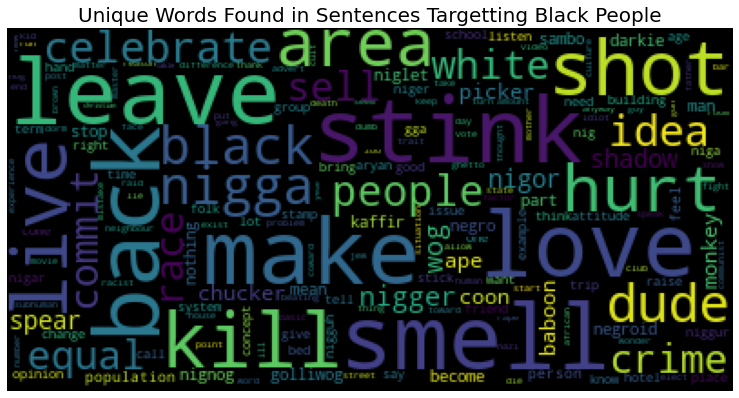

In [66]:
wc(words_black['Word'].unique(),'black','Unique Words Found in Sentences Targetting Black People')

In [67]:
words_black[words_black['Label'] == 1]['Word'].value_counts()

black        459
people       323
white        266
blacks       190
love         161
            ... 
tolerated      1
phones         1
damned         1
nerve          1
ptsd           1
Name: Word, Length: 4440, dtype: int64

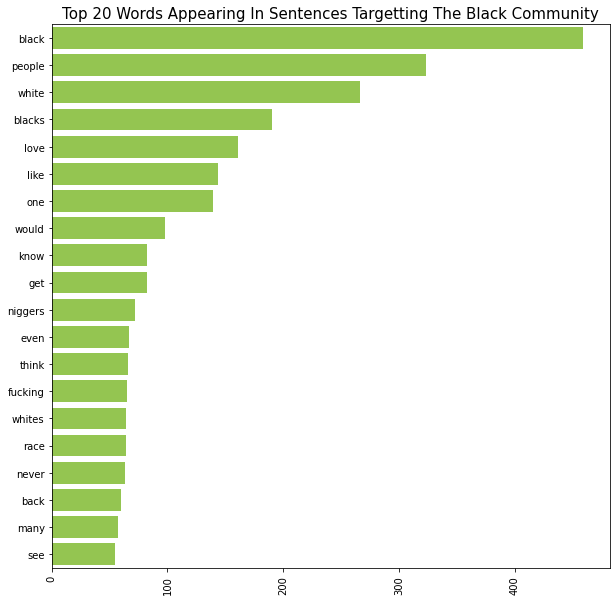

In [68]:
plt.figure(figsize = (10,10))
sns.barplot(y = words_black['Word'].value_counts()[:20].index , x = words_black['Word'].value_counts()[:20].values , color = '#97d83e')
plt.title('Top 20 Words Appearing In Sentences Targetting The Black Community' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [69]:
words_women = [ ]
labels = []
for _,row in m_data[m_data['targets'] == 'wom'].iterrows():
    a = row['Clean Text'].split()
    if(row['label'] == 0):
        labels+=[0 for i in range(len(a))]
    else:
        labels+=[1 for i in range(len(a))]
    words_women+=a

words_women = pd.DataFrame({'Word':words_women , 'Label':labels})
words_women.head()

,Word,Label
0,love,1
1,idea,1
2,seeing,1
3,women,1
4,burning,1


Text(0.5, 1.0, 'Total Sentences Labeled Hate and Not Hate')

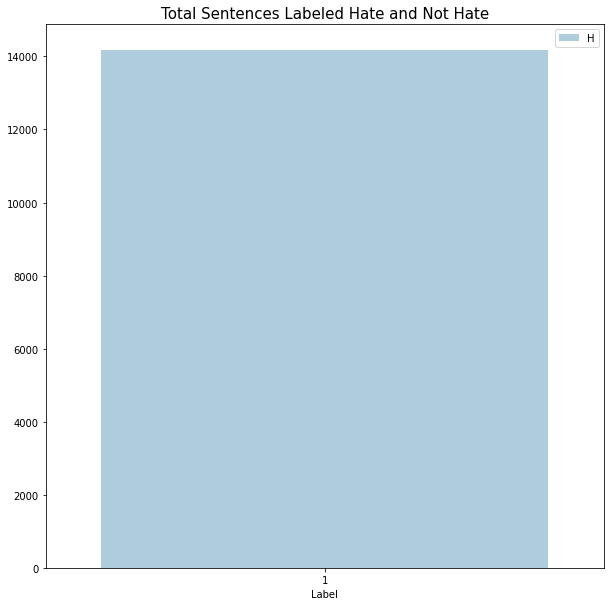

In [70]:
plt.figure(figsize = (10,10))
sns.countplot(words_women['Label'] , palette = 'Paired')
plt.ylabel("")
plt.legend('Hate')
plt.title('Total Sentences Labeled Hate and Not Hate' , fontsize = 15)

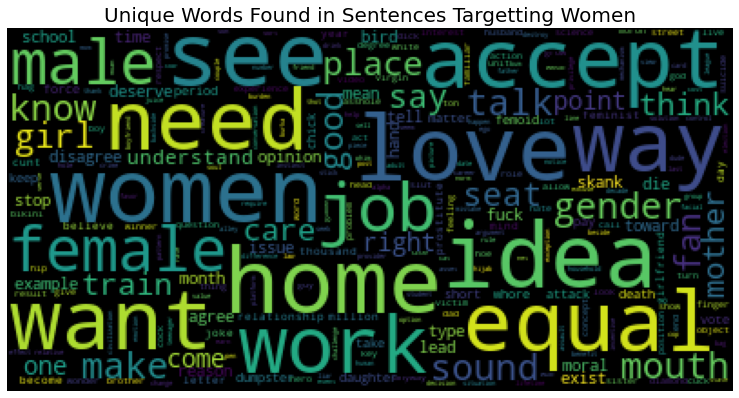

In [71]:
wc(words_women['Word'].unique() , 'black' , 'Unique Words Found in Sentences Targetting Women')

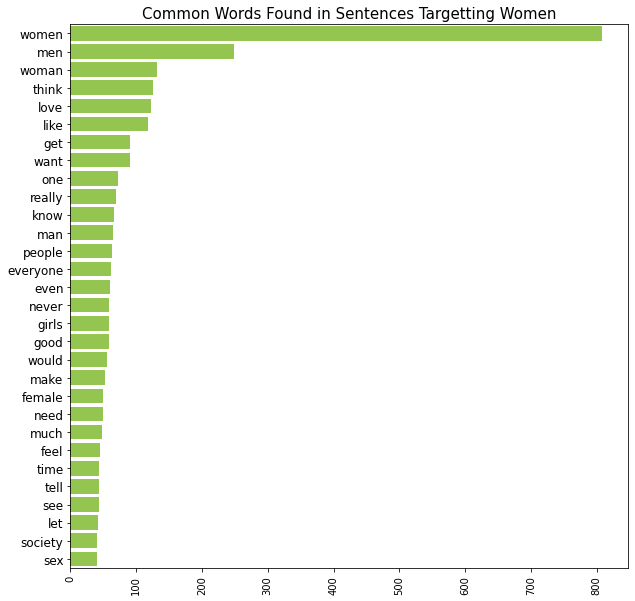

In [73]:
plt.figure(figsize = (10,10))
sns.barplot(y = words_women['Word'].value_counts()[:30].index , x = words_women['Word'].value_counts()[:30].values , color = '#97d83e')
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('Common Words Found in Sentences Targetting Women' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [74]:
label = {'hate':0 , 'nothate':1}
data['label'] = data['label'].map(label)
data.head()

,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator,Clean Text
0,10000,It should be legal for a husband to rape his wife,0,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,legal husband rape wife
1,10001,dalits are lowlife scum,0,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,dalits lowlife scum
2,10002,dalits are lowlives,0,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,dalits lowlives
3,10003,It was a better world when women dare not ques...,0,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,better world women dare question men
4,10004,I don't work this hard so that those immigrant...,0,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,work hard immigrants take benefits


In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD,PCA
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = data["text"].tolist()
list_labels = data["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

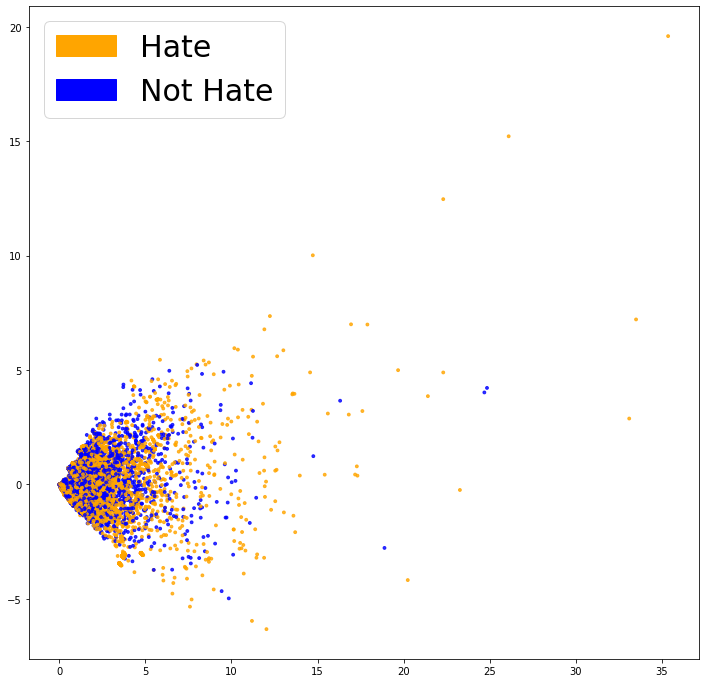

In [76]:
import matplotlib
import matplotlib.patches as mpatches
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Hate')
            blue_patch = mpatches.Patch(color='blue', label='Not Hate')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(12, 12))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [77]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

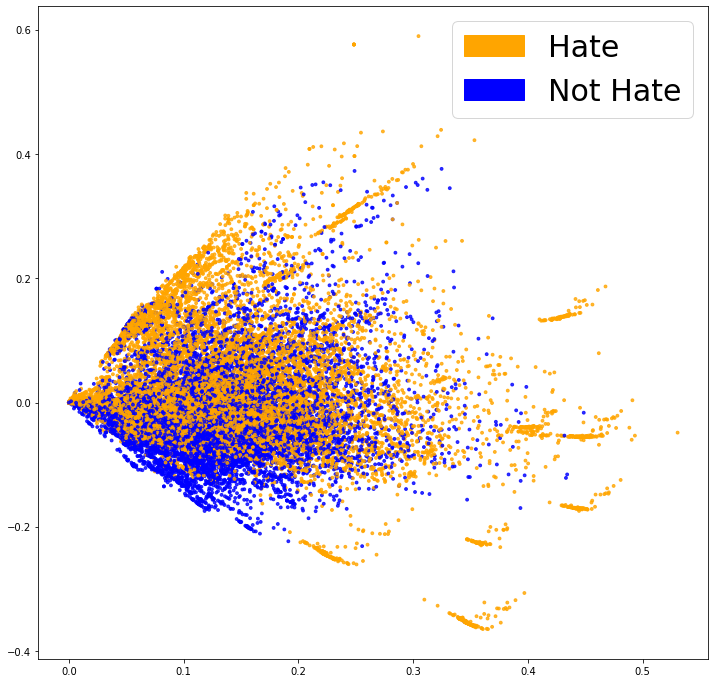

In [78]:
fig = plt.figure(figsize=(12, 12))          
plot_LSA(X_train_tfidf, y_train)
plt.show()